<center><h1>
Introduction to Image Analysis (Computer Vision)</h1>
<h3>Author: Bryce Asay</h3></center>

This is a quick introduction to image analysis using python. Python and C languages are the standard languages to analyze images. Within python there are a multitutde of options for you to use to analyze your data.  

OpenCV is the widely most used package and is the gold standard for image analysis software. The problem is that it is difficult to download the education edition which has some important functions which are not available to the general public. Additionally it is community maintained and has poor documentation. But OpenCV is the gold standard for a reason, is very effective for image analysis and is what I use. 

Scikit-image is also community maintained but has better documentation. It does not have the same versatility as opencv but it is still a great software. It was designed to be incorporated with both NumPy and SciPy wich are commonly used in image analysis. 

The Python Imaging Library (PIL) was originally implamented for Python2 and development had stopped around 2011. Pillow is the newer version with support for Python3. Pillow is probably the simpelest to use but has limited capabilities in image analysis. 

Mahotas is another image analysis library that boasts many algorithms implemented in C++ for speed and operating using numpy arrays but the simplicity of using a Python interface. It was original created for biologists but has quickly expanded its utility for many other image analysis applications. 

Matplotlib, Numpy and Tkinter (or wxpython) are additional libraries that are commonly used in Image analysis. 

I personally use Pillow for quick data exploration but generally use OpenCV 80% of the time and  Mahotas the other 20% for my analysis. 

The general strategy of image analysis is to 1) cleanup the imaeg, 2) isolate the regions of interest(ROI) (ex. cells, tissue, specific colors, shapes, etc.), 3) quantify the ROI (object counting, intensity, area, contrast, object detections, etc.)

First we are going to load the libraries that we will need for this exercise
We will import numpy and the Image package from Pillow 
os allows us to access the operating system from python

In [1]:
# Pillow can be installed with "conda install Pillow"
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

To open an image in python we use the Image.open("/directory/filename.jpg"), since the image we will be using is in the same directory there is no need to call up the path. Below is the first image.

<img src="halloween_charmander.png" style="height: 300px;"/>

In [2]:
img_png = Image.open("halloween_charmander.png")

File Formats and color spaces:

Our original image is a portable network graphic (.png) which is a lossless image file type that stores the information in the RGB format. RGB data is stored as arrays with a single color being compose of multiple values. Example is a dark purple can be creadted by using the values 153 (r) 50 (g) and 204 (b). 
There are also additional file types that are commonly used listed below:

Joint Photographic Experts Group (.jpg) which reduces the quality of the image but provides the benefit of having smaller file sizes and also uses the RGB format. This file type should be avoided since over time with multiple saves the image will degrade.  

Tagged Image Format (.tif) is lossless, uses RGB format, and uses compression to reduce the files size. 

Graphics Interchange Format (.gif) is commonly used in internet images. It is lossless but only supports 256 colors making it desirable for simpler images. Because it doesnt use an RGB format you can see below that the color format uses a Pallete (P) with each color having a unique designation from 1-256.

Hue, Saturation, Value(aka brightness) (HSV) is an incredably useful color format used in many object detection, quantification and analysis. It is so useful because HSV separates the luma (image intensity) from the chroma (color). HUE, or the color, values will be from a range of 0-360 with each value being a separate color similar to gif. This makes image analysis more robust to lighting differences but leaves the colors relatively intact. It is also useful when you are doing normalizatoin since you can just normalize on the Hue while leaving the other values alone. For most image analysis this is the image format that you should be using. Almost every image package has some method to convert from rgb to hsv and vice versa, which you will need to do for most images. 

More information on color formats can be found at http://colorizer.org/ .

Image file sizes for the charmader image:
.bmp = 2.28 MB
.gif = 215  KB
.jpg = 56   KB
.tif = 571  KB
.png = 328  KB

Personally I use .png since it has a nice balance between all the different file types.

Below is examples of converting files to the diferent file types. Converting to a .gif is trick since it does not have the pallete range that RGB has available to it. There is also the save function which is image_name.save('name_of_new_image.extension'). You can use most extensions to change from the different file types. 

In [3]:
#First we need to convert RGB to the Palette format
img_gif = img_png.convert('RGB').convert('P', palette=Image.ADAPTIVE)
#example of saving an image file as a gif
img_gif.save('halloween_charmander.gif')
#converting to an HSV file
img_hsv = img_png.convert("HSV")
#converting to an RBG file format
img_jpg = img_png.convert('RGB')
#example of saving and image file
img_jpg.save('halloween_charmander.jpg')
#Opening up the saved images for additional analysis
img_jpg = Image.open("halloween_charmander.jpg")
img_gif = Image.open("halloween_charmander.gif")

In [4]:
print("The file is a", img_gif.format,"with the color format",img_gif.mode, "and the image size is",img_gif.size)
print("The file is a", img_hsv.format,"with the color format",img_hsv.mode, "and the image size is",img_hsv.size)
print("The file is a", img_png.format,"with the color format",img_png.mode, "and the image size is",img_png.size)
print("The file is a", img_jpg.format,"with the color format",img_jpg.mode, "and the image size is",img_jpg.size)


The file is a GIF with the color format P and the image size is (774, 1032)
The file is a None with the color format HSV and the image size is (774, 1032)
The file is a PNG with the color format RGB and the image size is (774, 1032)
The file is a JPEG with the color format RGB and the image size is (774, 1032)


Below is a simple graphical user interface (GUI) using tkinter that finds the pixel values for RGB and Patllete color formats. 

In [5]:
from tkinter import *

root = Tk()

photo = PhotoImage(file = "halloween_charmander.png")
label = Label(root, image = photo)
label.pack()

def get_values(event):
    x,y = event.x, event.y
    r, g, b = img_png.getpixel((x, y))
    p = img_gif.getpixel((x,y))
    print('RBG : '+'{},{},{}'.format(r,g,b))
    print('P : ', p)
    print("X:",x,"Y:",y)
root.bind("<Button 1>",get_values)

root.mainloop()


Now that you know about what libraries to use, what file types are available and the different color formats we will move on to image manipulation. We will continue to use Pillow in this section but corresponding calls can be found in all other file types. 

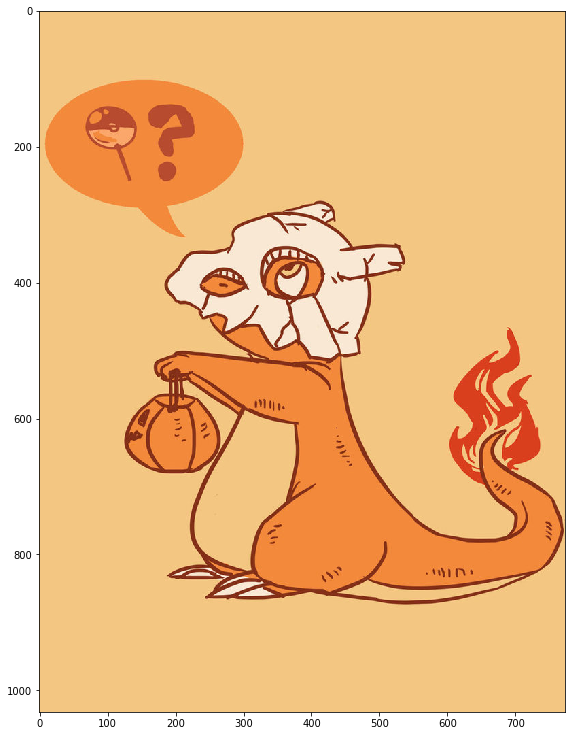

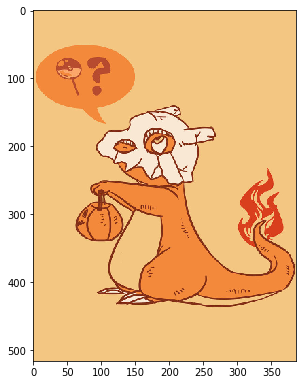

In [6]:
#Resize an image
width, length= img_png.size  #get the size of the image
resized_img = img_png.resize((width//2,length//2)) #reduce it by 50%

plt.figure(figsize=(img_png.size[0]/80.0, img_png.size[1]/80.0))
imshow(img_png) # original image
plt.figure(figsize=(resized_img.size[0]/80.0, resized_img.size[1]/80.0))
imshow(resized_img) # resized image


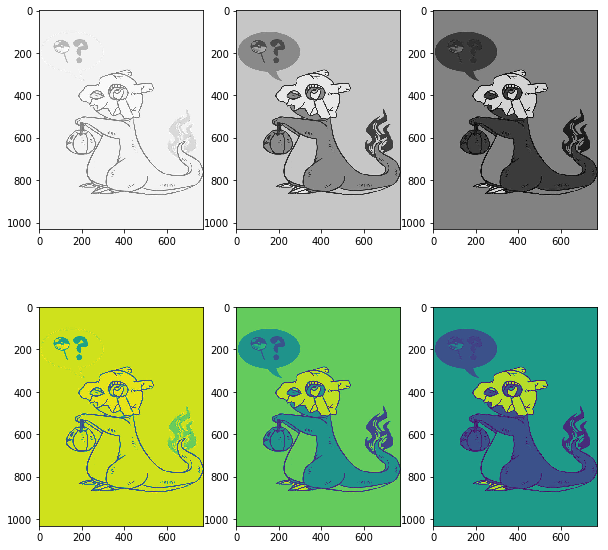

In [11]:
#splitting an image RGB
r,g,b = img_png.split()

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(2, 3, 1)
imshow(r)

fig.add_subplot(2, 3, 2)
imshow(g)

fig.add_subplot(2, 3, 3)
imshow(b)

fig.add_subplot(2, 3, 4)
imshow(np.asarray(r))

fig.add_subplot(2, 3, 5)
imshow(np.asarray(g))

fig.add_subplot(2, 3, 6)
imshow(np.asarray(b))

#Notice how when we show these images they come out as black and white, this is because we split the rbg channels
#into separate channels meaning a [120,56,23] now is only [120] for the r channel
#this is interpreted as now being a black and white image with numbers between between 1-254 as being gray.


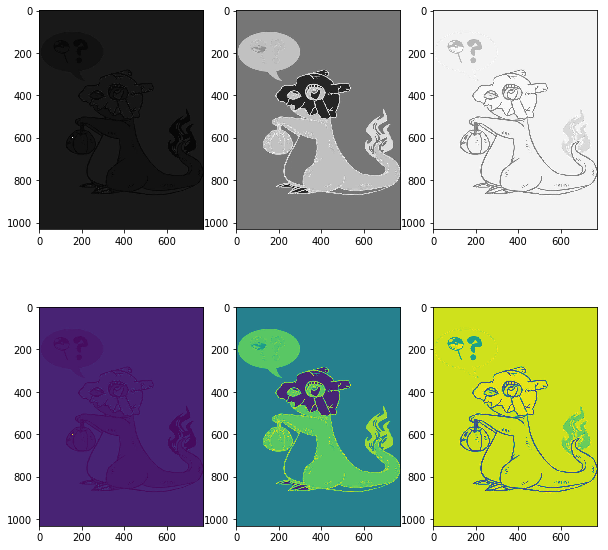

In [13]:
#splitting an image HSV
h,s,v = img_hsv.split()

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(2, 3, 1)
imshow(h)

fig.add_subplot(2, 3, 2)
imshow(s)

fig.add_subplot(2, 3, 3)
imshow(v)

fig.add_subplot(2, 3, 4)
imshow(np.asarray(h))

fig.add_subplot(2, 3, 5)
imshow(np.asarray(s))

fig.add_subplot(2, 3, 6)
imshow(np.asarray(v))
#here we can see how color (HUE) is visulaized differently from Saturation and Value 
#and hopefully you can get an idea why this is so important

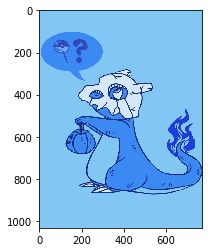

In [16]:
from PIL.Image import merge
#Merging bands
rgb_merged = merge("RGB", (b,g,r))
plt.figure(figsize=(4,4))
imshow(rgb_merged)
#notice that we changed the image from shades of orange to now shades of blue, this is handy for histology images. 

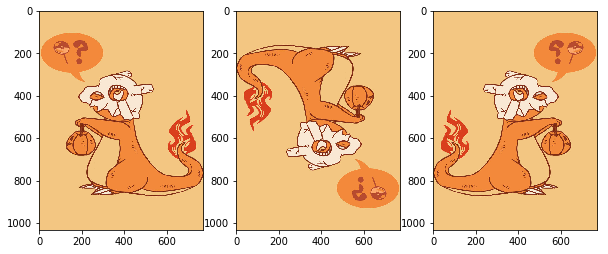

In [17]:
#Sometimes Pillow doesnt recognize the Image class, this can be remedied by importing the library as PIL.Image
import PIL.Image
#Rotating Image
img_rotated = img_png.rotate(180)
#Transposing an image (aka. Flipping)
img_flipped = img_png.transpose(PIL.Image.FLIP_LEFT_RIGHT)

fig = plt.figure(figsize=(10,10))
fig.add_subplot(1, 3, 1)
imshow(np.asarray(img_png))

fig.add_subplot(1, 3, 2)
imshow(img_rotated)

fig.add_subplot(1, 3, 3)
imshow(img_flipped)


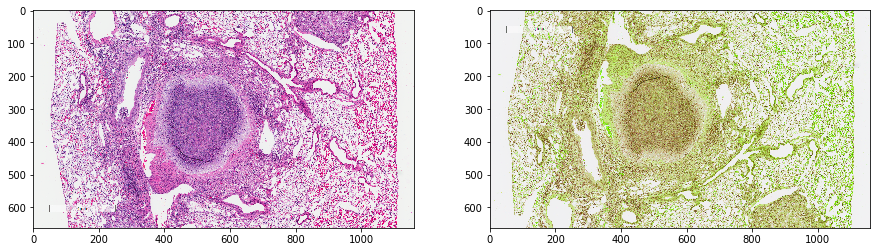

In [18]:
#lets try somethings we have learned from start to finish
hist_img = PIL.Image.open("histology.tif")
r,g,b = hist_img.split()
#Besides call particular functions one at a time you can do multiple functions at the exact same time
#Below we are merging and transposing the image in one step, when we do this the 
#functions are called from left to right, so make sure they re in the order you want them
new_hist_img = PIL.Image.merge("RGB",(b,r,g)).transpose(PIL.Image.FLIP_TOP_BOTTOM)

fig = plt.figure(figsize=(15,15))
fig.add_subplot(1, 2, 1)
imshow(hist_img)

fig.add_subplot(1, 2, 2)
imshow(new_hist_img)


With many analysis you will want to normalize the image, especially if you are comparing across multiple image types. For example, if you wanted to compare a .gif to a HSV file you can divide each pixel in the .gif by 256 and the HSV by 360.
Here is a great article explaining the basic processing of an image for analysis
http://marksolters.com/programming/2015/02/27/rgb-histograph.html

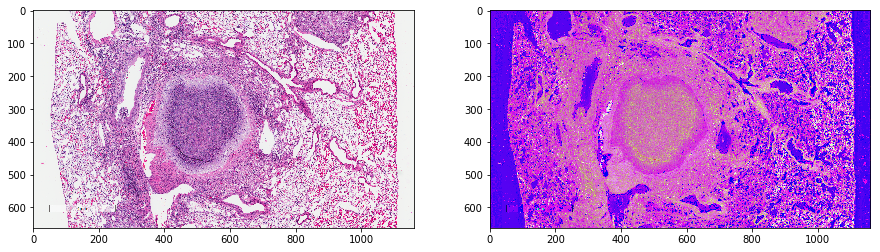

In [19]:
#Normalizing an image and get each pixel value as a separate point
#load the image
import colorsys
img_norm = PIL.Image.open("histology.tif")
#Change to an array
img_array = np.array(img_norm) / 255
for x in range(img_array.shape[0]):
    for y in range(img_array.shape[1]):
        img_array[x][y] = colorsys.rgb_to_hsv(img_array[x][y][0], img_array[x][y][1], img_array[x][y][2])

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(1, 2, 1)
imshow(img_norm)

fig.add_subplot(1, 2, 2)
imshow(img_array)




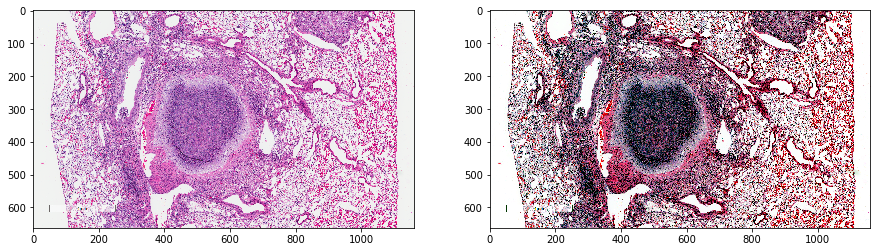

In [20]:
#Pillows built in normalization, Normalize the image contrast by Histogram
#takes a given percentage, removes the given values and then resets the highest and lowest values to 0 & 255 respectively
#
import PIL.ImageOps
#cutoff = What percent to cut off the histogram
#Ignore = Background pixel value, if no background use None
img_norm_pil = PIL.ImageOps.autocontrast(img_norm, cutoff = 10, ignore = 255)

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(1, 2, 1)
imshow(img_norm)

fig.add_subplot(1, 2, 2)
imshow(img_norm_pil)


Here is where we talk about Matplotlib and Numpy which are awesome for many image manipulation. When you load an image up into matplotlib it automatically uploads the image as an array which opens open a world of different opportunities for analysis (looking at you numpy / pandas). There are equivilent functions in standard image analysis packages but nothing beats the speed of numpy for image analysis. Plus you have a wide versatility for implamenting exactly what you want on very specific points. 

In [21]:
#Converting to a numpy array
import numpy as np
array_img = np.array(hist_img)
print(array_img)

[[[241 243 242]
  [241 243 242]
  [241 243 242]
  ...
  [241 243 241]
  [241 243 241]
  [  0   0   0]]

 [[241 243 242]
  [241 243 242]
  [241 243 242]
  ...
  [241 243 241]
  [241 243 241]
  [  0   0   0]]

 [[241 243 242]
  [241 243 242]
  [241 243 242]
  ...
  [241 243 241]
  [241 243 241]
  [  0   0   0]]

 ...

 [[238 244 238]
  [241 243 242]
  [241 243 242]
  ...
  [242 243 241]
  [242 243 241]
  [  0   0   0]]

 [[242 236 243]
  [241 243 242]
  [241 243 242]
  ...
  [242 243 241]
  [242 243 241]
  [  0   0   0]]

 [[240 243 240]
  [241 243 242]
  [241 243 242]
  ...
  [242 243 241]
  [242 243 241]
  [  0   0   0]]]


Lastly we will discuss the two most import functions you will use in image analysis: Blurring and Thresholding. Blurring removes all the background noise by smoothing the image and leaving the values that are most likely important. Thresholding turns the image into a binary format by separating the dark an light regions of an image. It is almost a given that you will use these before every image analysis project in order to clean up your data.

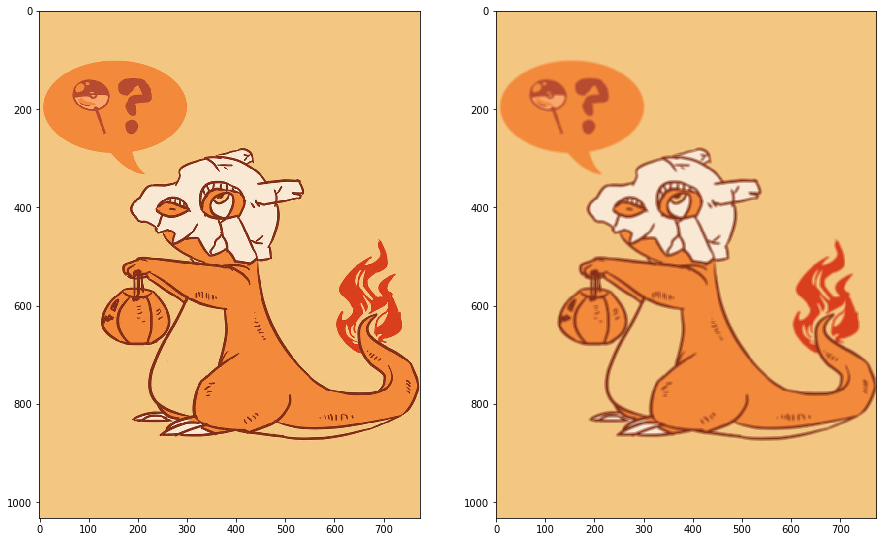

In [22]:
#Blurring an image
import PIL.ImageFilter
img_blur = img_png.filter(PIL.ImageFilter.BLUR)

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(1, 2, 1)
imshow(img_png)

fig.add_subplot(1, 2, 2)
imshow(img_blur)
#I know blurring is counterintuitive but it really is a very helpful tool in analysis

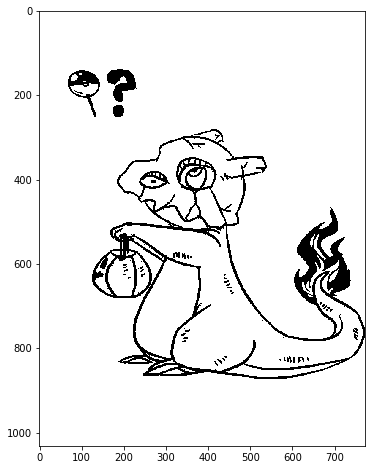

In [23]:
#Thresholding an Image, this is where Pillow starts to fall short. They have a point function 
#but OpenCV is what you should be using if you need to do thresholding at all
img_bw = img_png.convert("L")
threshold = 150
img_thresh = img_bw.point(lambda p:p>threshold and 255)

plt.figure(figsize=(8,8))
imshow(img_thresh)
#In opencv this method is one call function taking multiple parameters, it is also faster
#this is also a great way to make coloring pages for kids :)
